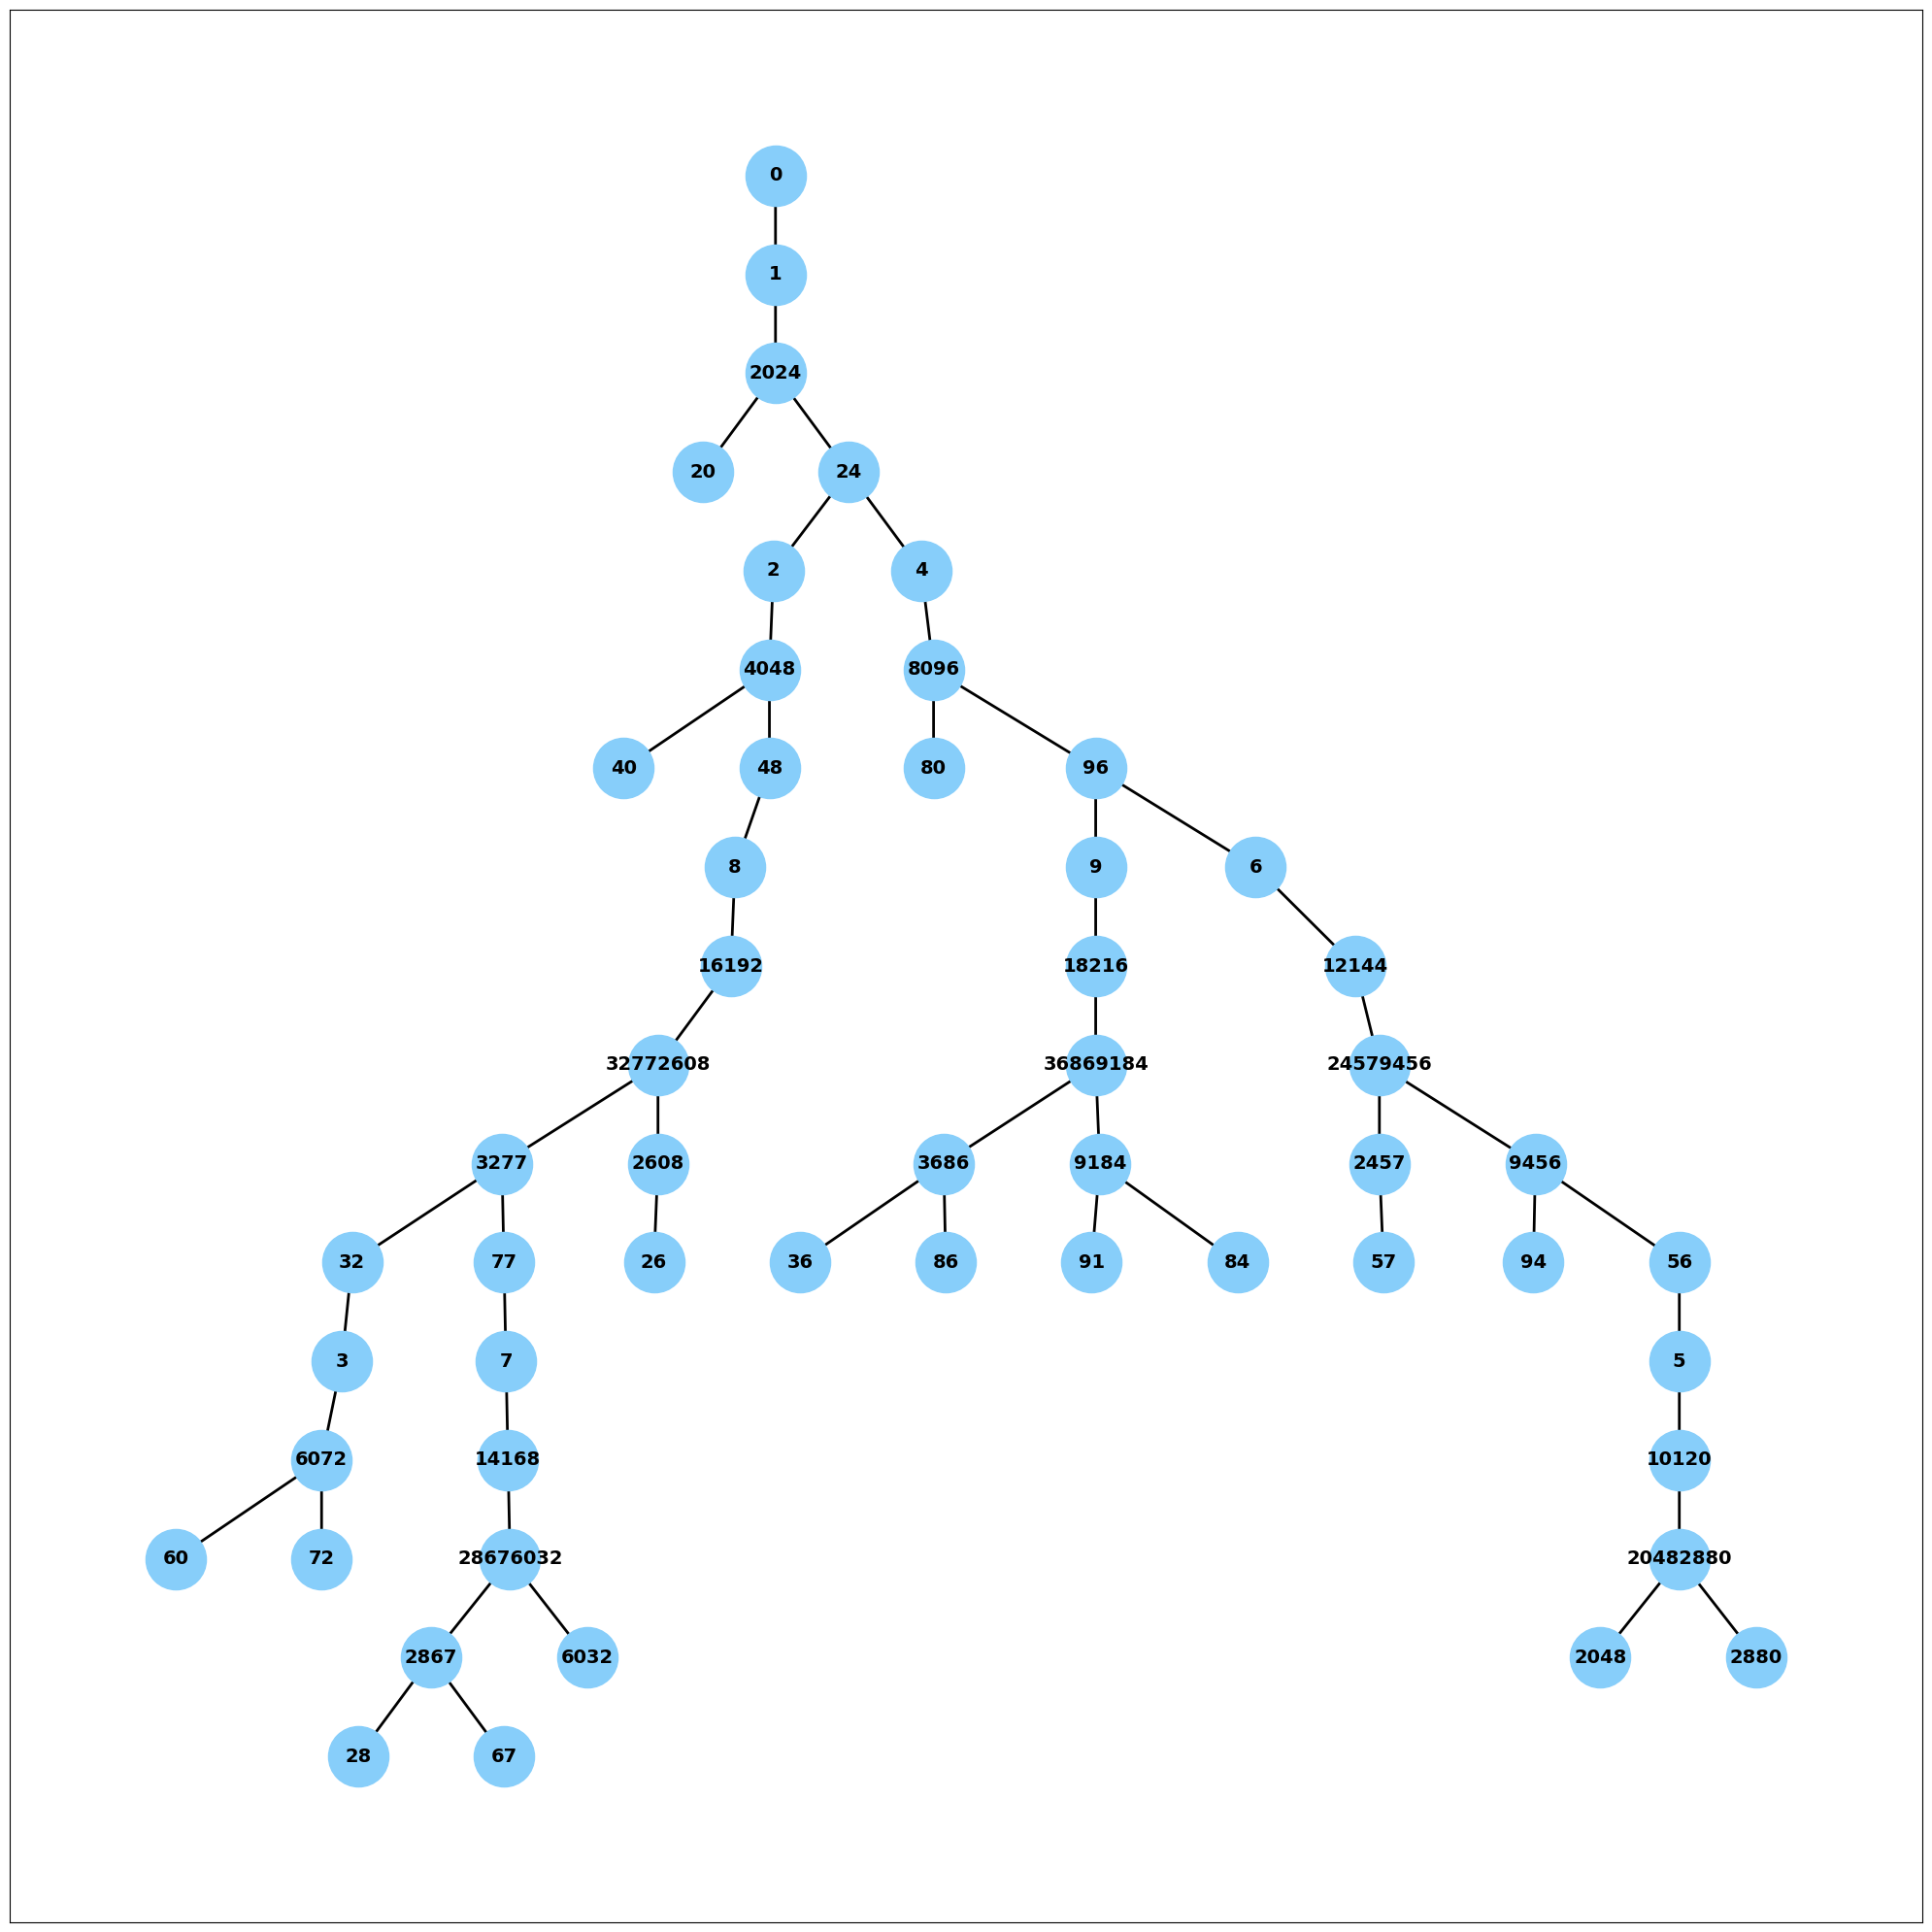

In [55]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from collections import deque

# If you haven't installed pygraphviz, install it via:
# !pip install pygraphviz
# On some systems, you may need to install graphviz system-wide first.

class Node():
    def __init__(self, n: int):
        self.n = n
        self.children: list[Node] = []

    def blink(self, n: int) -> list[int]:
        if n == 0:
            return [1]
        elif int(np.log10(n)) % 2 != 0:
            no_digits = int(np.log10(n)) + 1
            left = n // 10 ** (no_digits // 2)
            right = n % 10 ** (no_digits // 2)
            return [int(left), int(right)]
        else:
            return [n * 2024]

    def __str__(self):
        return f"{self.n}"

    def __repr__(self):
        return self.__str__()

    def __hash__(self):
        return hash(self.n)


class Tree():
    def __init__(self, init: list[int]):
        self.root = [Node(x) for x in init]
        self.memory: dict[Node, list[Node]] = {}
        self.leaf_nodes = self.root
        self.seen = set()

    def ping(self):
        new_leaf_nodes = []
        for ln in self.leaf_nodes:
            if ln not in self.memory:
                ln.children = [Node(x) for x in ln.blink(ln.n)]
                self.memory[ln] = ln.children
            else:
                ln.children = self.memory[ln]
        new_leaf_nodes += [c for ln in self.leaf_nodes for c in ln.children]
        self.leaf_nodes = new_leaf_nodes

    def add_nodes(self, G: nx.DiGraph):
        depth = 0
        nodes = deque(self.root)
        while len(nodes) > 0:
            depth += 1
            child_level = set()

            for _ in range(len(nodes)):
                node = nodes.popleft()
                if node.n not in self.seen:
                    G.add_node(node.n, layer=depth)
                    self.seen.add(node.n)

                for c in node.children:
                    if c.n not in self.seen:
                        self.seen.add(c.n)
                        G.add_node(c.n, layer=depth+1)
                        G.add_edge(node.n, c.n)
                        child_level.add(c)
            nodes.extend(child_level)

    def graph(self):
        G = nx.DiGraph()
        self.add_nodes(G)

        # Use graphviz_layout with the "dot" program for a hierarchical layout.
        # This will arrange the tree top-down by default.
        pos = nx.nx_agraph.graphviz_layout(G, prog='dot')

        plt.figure(figsize=(20, 20))
        
        # Increase node size and label font size
        nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='#87CEFA', node_shape='o')
        nx.draw_networkx_labels(G, pos, font_size=14, font_weight='bold')
        nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='#000000', width=2)

        # Make the layout tighter
        plt.tight_layout()
        
        # Show and save the figure
        plt.savefig("graph.png", dpi=300)
        plt.show()


tree = Tree([0])
for i in range(19):
    tree.ping()

tree.graph()